In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import utilities

In [3]:
from importlib import reload

In [4]:
reload(utilities)

<module 'utilities' from 'C:\\Users\\luisr\\SharedProjects\\HowToWinKaggle\\FinalProject\\utilities.py'>

In [5]:
sales = utilities.load_and_preprocess()

In [6]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Month
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
2,2013-01-05,0,25,2552,899.00,-1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,2015-10
2935845,2015-10-09,33,25,7460,299.00,1.0,2015-10
2935846,2015-10-14,33,25,7459,349.00,1.0,2015-10
2935847,2015-10-22,33,25,7440,299.00,1.0,2015-10


In [7]:
categories = pd.read_csv('data/item_categories.csv')
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')

In [19]:
agg_sales = sales.groupby(['Month', 'shop_id', 'item_id']).item_cnt_day.sum().rename('item_cnt_month').reset_index()

In [20]:
agg_sales

,Month,shop_id,item_id,item_cnt_month
0,2013-01,0,32,6.0
1,2013-01,0,33,3.0
2,2013-01,0,35,1.0
3,2013-01,0,43,1.0
4,2013-01,0,51,2.0
...,...,...,...,...
1609119,2015-10,59,22087,6.0
1609120,2015-10,59,22088,2.0
1609121,2015-10,59,22091,1.0
1609122,2015-10,59,22100,1.0


In [21]:
augmented_sales = pd.merge(agg_sales, items[['item_id', 'item_category_id']], on='item_id')

In [22]:
augmented_sales

,Month,shop_id,item_id,item_cnt_month,item_category_id
0,2013-01,0,32,6.0,40
1,2013-01,1,32,7.0,40
2,2013-01,3,32,3.0,40
3,2013-01,4,32,2.0,40
4,2013-01,6,32,8.0,40
...,...,...,...,...,...
1609119,2015-10,55,12733,2.0,76
1609120,2015-10,55,13092,1.0,36
1609121,2015-10,55,16797,1.0,78
1609122,2015-10,55,18060,1.0,44


In [23]:
month_category_sales = augmented_sales.groupby(['Month', 'shop_id', 'item_category_id']).item_cnt_month.mean().unstack(level=1)

In [24]:
month_category_sales

shop_id                        0     1    2          3     4     5   \
Month   item_category_id                                              
2013-01 0                     NaN   NaN  NaN        NaN   NaN   NaN   
        1                     NaN   NaN  NaN        NaN   NaN   NaN   
        2                  3.3125   2.6  2.5   1.666667   2.0   NaN   
        3                 28.0000  13.0  9.0   4.000000   7.0   NaN   
        4                  3.2000   3.0  2.5   1.000000   3.0   NaN   
...                           ...   ...  ...        ...   ...   ...   
2015-10 76                    NaN   NaN  NaN        NaN   NaN   NaN   
        77                    NaN   NaN  NaN        NaN   NaN   NaN   
        78                    NaN   NaN  NaN        NaN   NaN   NaN   
        79                    NaN   NaN  7.0  15.000000  25.0  12.0   
        83                    NaN   NaN  1.0   1.500000   NaN   4.5   

shop_id                          6          7         8   9   ...         50  \
Month   item_category_id                                      ...              
2013-01 0                       NaN        NaN       NaN NaN  ...        NaN   
        1                       NaN        NaN       NaN NaN  ...        NaN   
        2                  2.529412   2.615385  1.428571 NaN  ...   3.235294   
        3                 15.000000  12.000000       NaN NaN  ...  15.000000   
        4                  1.000000   2.666667  1.000000 NaN  ...   3.000000   
...                             ...        ...       ...  ..  ...        ...   
2015-10 76                      NaN        NaN       NaN NaN  ...        NaN   
        77                      NaN   1.000000       NaN NaN  ...        NaN   
        78                      NaN        NaN       NaN NaN  ...        NaN   
        79                18.000000  22.000000       NaN NaN  ...   7.000000   
        83                 2.000000   3.250000       NaN NaN  ...   2.500000   

shop_id                          51        52         53    54        55  \
Month   item_category_id                                                   
2013-01 0                       NaN       NaN        NaN   NaN       NaN   
        1                       NaN       NaN        NaN   NaN       NaN   
        2                  2.111111  1.500000   1.428571   3.5       NaN   
        3                 10.000000  6.000000   5.000000  27.0       NaN   
        4                  1.750000  0.333333   1.333333   1.6       NaN   
...                             ...       ...        ...   ...       ...   
2015-10 76                      NaN       NaN        NaN   NaN  3.285714   
        77                      NaN       NaN        NaN   NaN       NaN   
        78                      NaN       NaN        NaN   NaN  1.230769   
        79                      NaN  6.000000  18.000000   NaN       NaN   
        83                      NaN  3.333333   2.666667   NaN       NaN   

shop_id                          56        57        58     59  
Month   item_category_id                                        
2013-01 0                       NaN       NaN       NaN    NaN  
        1                       NaN       NaN       NaN    NaN  
        2                  2.125000       NaN       NaN   2.00  
        3                  6.000000       NaN       NaN   8.00  
        4                  0.333333       NaN       NaN   1.75  
...                             ...       ...       ...    ...  
2015-10 76                      NaN       NaN       NaN    NaN  
        77                      NaN       NaN       NaN    NaN  
        78                      NaN       NaN       NaN    NaN  
        79                14.000000  6.000000  3.000000  13.00  
        83                 7.000000  5.333333  3.666667   3.00  

[2077 rows x 60 columns]

In [28]:
temp = month_category_sales[12].unstack(level=1).fillna(0)

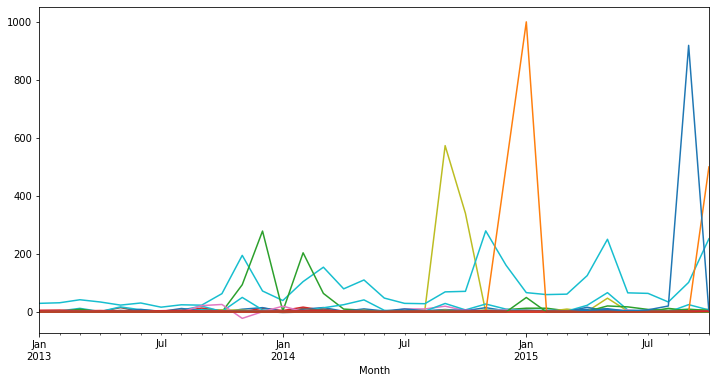

In [30]:
temp.plot(legend=False, figsize=(12,6))

In [32]:
temp

item_category_id,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
Month,,,,,,,,,,,,,,,,,,,,,
2013-01,0.0,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,29.800000,...,0.0,1.352941,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-02,0.0,0.0,1.700000,0.000000,0.000000,1.000000,1.333333,0.000000,0.000000,31.800000,...,0.0,0.933333,0.0,1.250000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-03,0.0,0.0,1.200000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000,42.200000,...,0.0,2.000000,0.0,1.600000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-04,0.0,0.0,1.888889,0.000000,1.000000,1.200000,1.333333,0.000000,0.000000,34.500000,...,0.0,1.466667,0.0,1.307692,0.0,0.0,0.000000,0.0,0.0,0.0
2013-05,0.0,0.0,1.200000,0.000000,1.333333,1.000000,1.333333,0.000000,0.000000,23.750000,...,0.0,2.090909,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-06,0.0,0.0,1.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,31.000000,...,0.0,2.818182,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-07,0.0,0.0,1.200000,1.000000,0.000000,1.000000,1.222222,0.000000,0.000000,16.600000,...,0.0,1.384615,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-08,0.0,0.0,1.461538,1.000000,0.000000,1.500000,0.000000,0.000000,0.000000,24.800000,...,0.0,1.214286,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2013-09,0.0,0.0,1.250000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,23.500000,...,0.0,1.312500,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
temp